# PHYS 481 Assignment 4
October 1, 2019

## Authors: 
Siegfried Peschke (30032136) \\
Matthew Bouchard (30003689) \\
Chris Godek (30030527)






### Importing Necessary Packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scipy

## Question 1 - Simulating Random Walks

**Problem (20 points):** Write a Python code to follow the path of a random walker in one dimension for $N$ steps, where $N$ is large (but where $\sqrt{N}$ is smaller than the total grid size). Store the result and repeat for many walkers to obtain a good sample. Show that the distribution of walker positions is a Gaussian. Calculate the mean width (standard deviation) of the distribution as a function of $N$, and compare with the theoretical results above. 

In [0]:
def walker_statistics(nsteps,ntrials):
  
  """
  
  -- General Description --
  
  The purpose of this function is determine statistics regarding where a random walker will
  land after a particular number of steps. So for example: where does a walker land after taking
  100 steps; each of which there is a random chance of stepping left or right. Lets say lands on
  20. Alright, how about if we run the trial again? We land on a -25. As we continue to do this
  we will retrieve statistics regarding where the walker has landed afte each trial. This function
  returns the position of each random walker for N trials (ntrials).
  
  -- How it Works -- 
  
  The function will determine the final space of walker after they take nsteps. This value
  will be appended to a master list. The trial will then be run again, and will continue to append
  values until N trials (defined by the user) have been ran. The returned list will contain the final
  position of the walker after each trial run.
  
  -- Arguments --
  
  nsteps = How many steps the random walker is taking in each trial
  ntrials = The number of times that a walker will be peforming nsteps
  
  """
  
  value_list = np.array([])
  
  for run in range(ntrials):
    val = 0 # The walker will start in the centre of his grid
    movement = np.random.randint(0,2,nsteps)
    
    for i in range(nsteps): # Here we will be moving randomly over every step
      move = movement[i]

      if move == 1:
        val += 1 # Move the walker to the right (+1)
      else:
        val -=1 # Move the walker to the left (-1)

    value_list = np.append(value_list, val)
    
  return value_list

In [0]:
def probability_walker2(nsteps,ntrials):
  
  """
  
  -- How it Works --
  
  This function determines the number of times that n walkers have reached specific
  locations after n steps. This will allow us to create a probability distribution
  of how likely walkers are to land in a specific location. This function outputs
  the final unique locations that the walkers have landed, and the normalized value
  of how many times they have landed at said location.
  
  -- Arguments --
  
  nsteps = The number of steps each individual walker will be taking
  ntrials = the number of walkers taking nsteps
  
  """

  possible_locations = walker_statistics(nsteps,ntrials)
  
  locations = np.unique(possible_locations, return_counts=True)[0]
  occurance = np.unique(possible_locations , return_counts=True)[1]
  
  # We will divide occurance by ntrials to normalize the returned values
  
  return locations, occurance/ntrials

<BarContainer object of 90 artists>

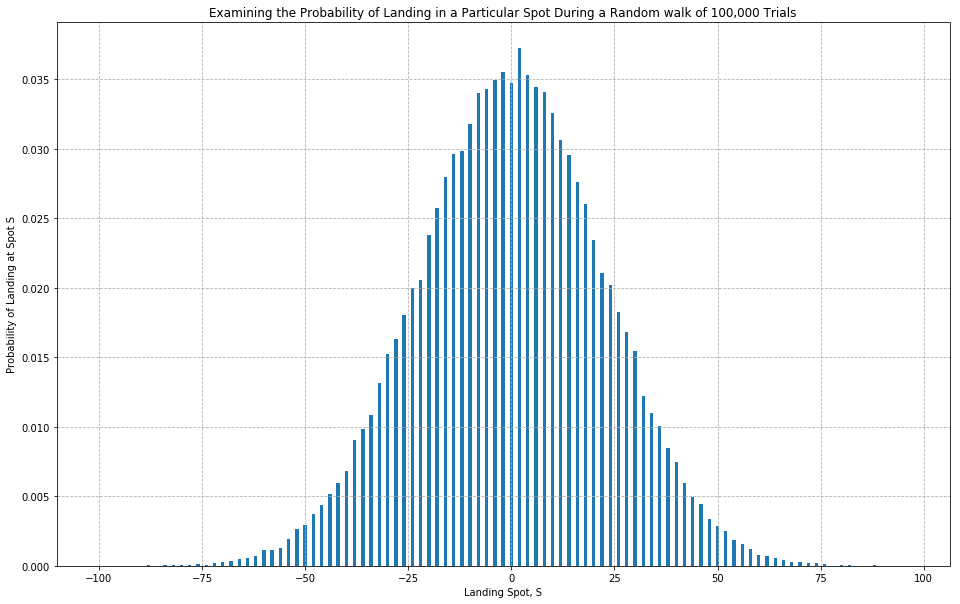

In [0]:
# Plotting Labels
plt.figure(figsize=(16,10))
plt.xlabel('Landing Spot, S')
plt.ylabel('Probability of Landing at Spot S')
plt.title('Examining the Probability of Landing in a Particular Spot During a Random walk of 100,000 Trials')
plt.grid(linestyle='dashed')

# Generating values to plot
location, occurance = probability_walker2(500,100000)

#Plotting Values and Associated Trendline
plt.bar(location, occurance, label = 'Probability Distribution')# Plotting values of N against r in a scatter plot

In [0]:
def std_calculator(nrange,ntrials):
  
  """

  -- How it Works --
  
  This function will calculate the probability distribution (shown above) of a random 
  walk over ntrials for a range of steps. The range of steps can be chosen by the user,
  however, it is recomended to have around 500 steps for an ample set of information. 
  This function will then utilize np.std, which calculates the standard deviation of a given
  probability distribution. It will then output two lists, (1) the number of steps taken for
  each (2) standard deviation value. 
  
  -- Arguments --
  
  nrange = The range over which we would like to determine the standard deviations,
           measured in the number of steps. I.e could be examining the range of 300 
           steps.
  ntrials = How many walkers will be trialed
  
  """
  
  std = []
  range_vals = []
  
  nt = ntrials
  
  for n in range(1,nrange):
    result = np.std( walker_statistics(n,nt))
    range_vals.append(n)
    std.append(result)
    
  return range_vals, std

In [0]:
# Storing values for the experimental derived standard deviation
range_vals, std = std_calculator(500,1000)

In [0]:
# Saving values for the expected sqrt(N) relationship
expected = []

for i in range(1,500):
  root = np.sqrt(i)
  expected.append(root)

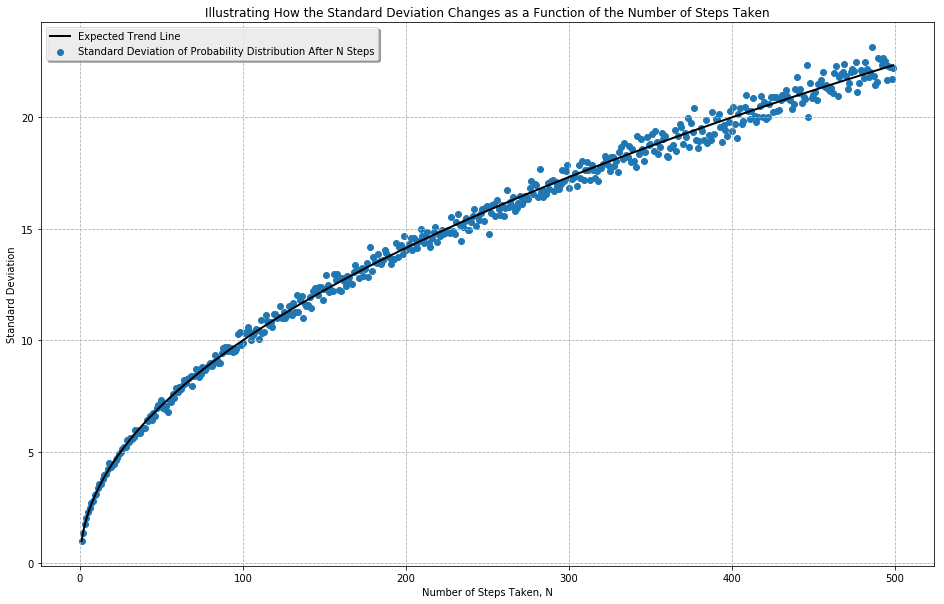

In [0]:
# Plotting Labels
plt.figure(figsize=(16,10))
plt.xlabel('Number of Steps Taken, N')
plt.ylabel('Standard Deviation')
plt.title('Illustrating How the Standard Deviation Changes as a Function of the Number of Steps Taken')
plt.grid(linestyle='dashed')

#Plotting Values and Associated Trendline
plt.scatter(range_vals,std,label = 'Standard Deviation of Probability Distribution After N Steps') # Plotting values of N against r in a scatter plot
plt.plot(range_vals,expected,color = 'black',linewidth = 2, label = 'Expected Trend Line')

# Legend Settings
legend = plt.legend( loc = 0 , shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

## Question 2: Random Walk as Markov Chain

**Problem (10 points):** Using the transition matrix approach for a sufficiently large $N$, write a program to generate the probability distribution for a random walk on a one-dimensional lattice with periodic boundary conditions after many steps, and compare with the results in Problem 3.1.1.

To start, allow us to derive a function that will create an NxN transition matrix. We can do this by following the patterns exhibted in 3 lowest order matricies (i.e N = 3 , 4 , 5) below:


$$T_3=\begin{pmatrix}
0 & \frac{1}{2} & \frac{1}{2}\cr
\frac{1}{2} & 0 & \frac{1}{2}\cr
\frac{1}{2} & \frac{1}{2} & 0\cr
\end{pmatrix}.
$$

$$T_4=\begin{pmatrix}
0 & \frac{1}{2} & 0 & \frac{1}{2}\cr
\frac{1}{2} & 0 & \frac{1}{2} & 0\cr
0 & \frac{1}{2} & 0 & \frac{1}{2}\cr
\frac{1}{2} & 0 & \frac{1}{2} & 0\cr
\end{pmatrix}.
$$

$$T_5=\begin{pmatrix}
0 & \frac{1}{2} & 0 & 0 & \frac{1}{2}\cr
\frac{1}{2} & 0 & \frac{1}{2} & 0 & 0\cr
0 & \frac{1}{2} & 0 & \frac{1}{2} & 0\cr
0 & 0 & \frac{1}{2} & 0 & \frac{1}{2}\cr
\frac{1}{2} & 0 & 0 & \frac{1}{2} & 0\cr
\end{pmatrix}.
$$

I would like to draw our attention to a pattern that is exhibted (I will ignore where the matricies come from for brevity). In the first row we see the following trend:

1. The second element is always $\frac{1}{2}$
2. The last element is alwas a $\frac{1}{2}$

Now, as we move down the matrix and focus on other rows (i.e 2,3,4 etc.) We see that the first row has simply been 'rolled' over by 1 position. As such, this makes it extremely easy for us to create the transition matricies by following the first two points and the roll algorithm. As such, allow us to make a function that works through this:

In [0]:
def gen_T(N):

    
  """
  
  -- General Description --
  
  The purpose of this function is to create an NxN transition matrix. Where N is the number
  of spots that can be reached in the 1D "probability" driven walk.
  
  -- How it Works --
  
  This function starts by creating a 1D array of 0's; where its length is governed by N. As per
  the pattern described above, the function will then append a 1/2 value to the second element
  and last element of the list. Following this, the first row will appended to the transition
  matrix T upon which the the row will be rolled. The newly rolled row (shifted one space to the
  right) will be appended to the list. This rolling process will occur N times in order to create a 
  the NxN transition matrix.
  
  -- Arguments --
  
  N = The size of your NxN transition matrix
  
  """
  
  T = [] # The transition matrix
  
  row = np.zeros((N,), dtype=float) # The initial size of the transition matrix
  row[1], row[N-1] = 0.5, 0.5 # Appending the half values to our list of zeros
  
  for i in range(N): # Constructing an NxN matrix with each row rolled over
    T.append(row)
    row = np.roll(row, 1)
    
  return T

In [0]:
# Calling the function quickly to see if we returned the correct result
gen_T(5)

[array([0. , 0.5, 0. , 0. , 0.5]),
 array([0.5, 0. , 0.5, 0. , 0. ]),
 array([0. , 0.5, 0. , 0.5, 0. ]),
 array([0. , 0. , 0.5, 0. , 0.5]),
 array([0.5, 0. , 0. , 0.5, 0. ])]

Now, allow us to create a function that will display the transition matrix after many steps. We can do this by simply multiplying the transition matrix by the initial postion vector. If we continuously multiply the output by the transition matrix then we will take sucessive 'steps'. For example, if we multiply the transition matrix by the initial vector we will have taken one step. If we multiply the transition matrix by the output of the first statement we will have taken a second step, and so on and so forth. So, before we can do his allow us to generate the initial starting position vector:

In [0]:
def gen_position_vector(N):
  
  """
  
  -- How it works --
  
  This function creates a position vector that has a length corresponding to N, were NxN
  is the size of the transition matrix. The walker will be placed at the middle of the
  vector for each matrix size N.
  
  -- Arguments --
  
  N = The size of the array through which we will be stepping
  """
  
  pos = np.zeros(N, dtype=float) #Create position vector
  
  if N // 2:
    pos[N//2] = 1.0  #Place yourself at the middle of position vector
    
  else:
    pos[(N//2)+1] = 1.0  #Place yourself at the middle of position vector
    
  return pos

With the final multiplication given by:

In [0]:
def Markov_evolution(N, m):
  
  """
  
  --- How it Works --
  
  What this function does is multiply that transition matrix (i.e the probability of taking a
  step) by the initial position vector. It will then continue to do this for as many steps as 
  indicates my the user, m.
  
  -- Arguments --
  
  N = size of transition matrix
  m = number of steps
  
  """
  
  pos = gen_position_vector(N)
  T = gen_T(N) #Generate transition matrix T
  
  for i in range(m-1):
    pos = np.dot(T,pos) #Perform matrix multiplication to obtain T^m
  return pos #Return the matrix dotted with the position vector for the m'th column

<BarContainer object of 500 artists>

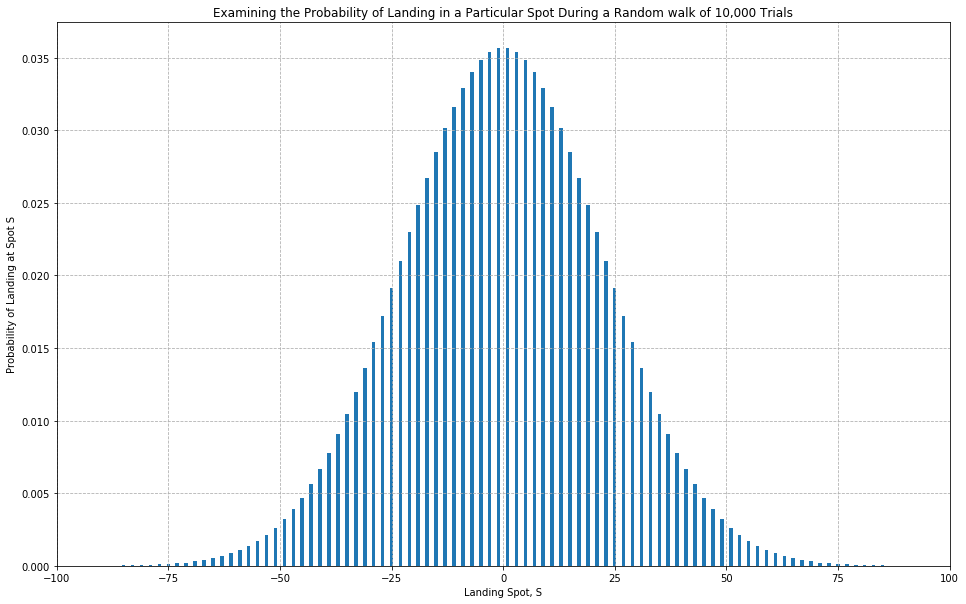

In [0]:
# Plotting Labels
plt.figure(figsize=(16,10))
plt.xlabel('Landing Spot, S')
plt.ylabel('Probability of Landing at Spot S')
plt.title('Examining the Probability of Landing in a Particular Spot During a Random walk of 10,000 Trials')
plt.grid(linestyle='dashed')
plt.xlim(-100,100)

# Generating values to plot

probabilities = Markov_evolution(500,500)
vals = []

for i in range(-250,250): # The number of spots that can be landed on
  vals.append(i)

#Plotting Values and Associated Trendline
plt.bar(vals, probabilities)# Plotting values of N against r in a scatter plot

The general distribution is exactly the same as it was in problem 1. The only variations being the difference in probabilities at specific landing spots. 

This difference can be attributed to the nature of the question. In problem 1 we were performing a "trial" where the walker would randomly choose a position - this is similar to an experimental method. Here we are setting the probability of "drunkinly" walking as being 50/50. For this reason we get a perfect distribution - which can also be described as being an "expected" distribution.

If we increase the number of steps taken we will see that the probability distribution becomes wider and flatter, as was predicted in problem 1. 

<BarContainer object of 500 artists>

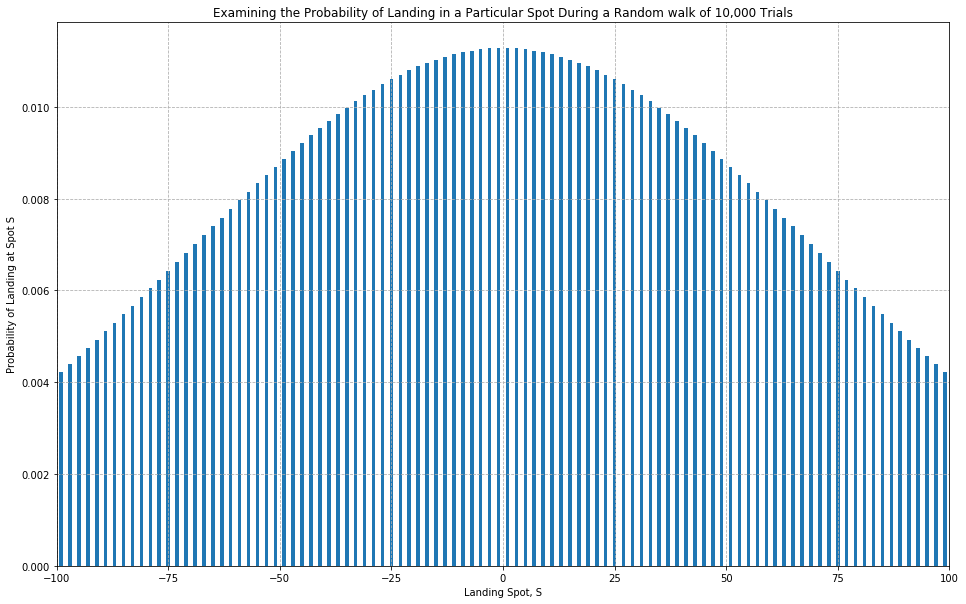

In [0]:
# Plotting Labels
plt.figure(figsize=(16,10))
plt.xlabel('Landing Spot, S')
plt.ylabel('Probability of Landing at Spot S')
plt.title('Examining the Probability of Landing in a Particular Spot During a Random walk of 10,000 Trials')
plt.grid(linestyle='dashed')
plt.xlim(-100,100)

# Generating values to plot

probabilities = Markov_evolution(500,5000)
vals = []

for i in range(-250,250): # The number of spots that can be landed on
  vals.append(i)

#Plotting Values and Associated Trendline
plt.bar(vals, probabilities)# Plotting values of N against r in a scatter plot

**Problem (20 points):** Determine computationally (by effecting a series of matrix multiplications), for small values of $3\leq N < 20$ ($N$ odd), if the one-dimensional random walk Markov chain has a steady state limit. If so, how does the time to reach steady state depend on $N$? Why didn't I ask you to consider even $N$?

To start, allow us to write a function that will determine if and where we have reache steady state:

In [0]:
def find_steady_state(N, tol):
  
  """
  
  -- How it Works -- 
  
  This function finds the steady state of the Markov chain by incrementally increasing
  the number of steps taken until the probability of landing in a location is the same
  for all locations i.e. an even probability distribution. Once the probability distribution
  is flat, return the number of steps required to achieve this flat distribution.
  
  -- Arguments --
  
  N = The size of the transition matrix (Where we have a square matrix NxN)
  tol = The tolerance for which we will determine steady state
  
  """
  
  m = 0
  prob_vector = Markov_evolution(N, m)
  maximum = max(prob_vector)
  within_tol = 0
  
  while within_tol < len(prob_vector):
    
    within_tol = 0
    m += 1
    prob_vector = Markov_evolution(N, m)
    maximum = max(prob_vector)
    
    for val in prob_vector:
      if abs(maximum-val) < tol:
        within_tol += 1
        
  return m

Now, allow us to use this function to determine when steady state has been reached:

In [0]:
tol = 1e-11

matrix_vals = []
steady_state_vals = []

for N in range(3,20,2): #Iterate through increasing size of transition matrix
  
  matrix_vals.append(N) # Appending the size of the matrix that is being examined for steady state
  m = find_steady_state(N, tol) # Calculating when steady state has been reached
  steady_state_vals.append(m)
  
  print('Transition matrix size N =', N, 'achieves steady state with m =', m, 'steps.')

Transition matrix size N = 3 achieves steady state with m = 38 steps.
Transition matrix size N = 5 achieves steady state with m = 119 steps.
Transition matrix size N = 7 achieves steady state with m = 239 steps.
Transition matrix size N = 9 achieves steady state with m = 395 steps.
Transition matrix size N = 11 achieves steady state with m = 589 steps.
Transition matrix size N = 13 achieves steady state with m = 820 steps.
Transition matrix size N = 15 achieves steady state with m = 1088 steps.
Transition matrix size N = 17 achieves steady state with m = 1392 steps.
Transition matrix size N = 19 achieves steady state with m = 1732 steps.


It is important to note that varying the tolerance does create a slight variation in the determination of when steady state is reached. Now, let us plot these values:

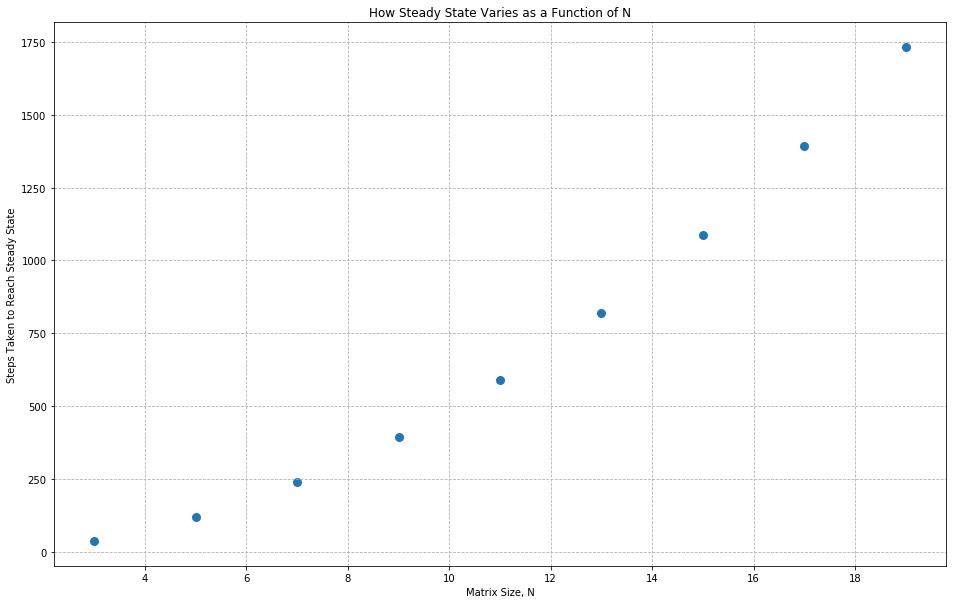

In [0]:
# Plotting Labels
plt.figure(figsize=(16,10))
plt.xlabel('Matrix Size, N')
plt.ylabel('Steps Taken to Reach Steady State')
plt.title('How Steady State Varies as a Function of N')
plt.grid(linestyle='dashed')
#plt.xscale('log')
#plt.yscale('log')

#Plotting Values and Associated Trendline
plt.scatter(matrix_vals, steady_state_vals, linewidth = 3 , label = 'Start of Steady State')# Plotting values of N against r in a scatter plot

Clearly this graph is exponential in nature. So allow us to create a log-log plot to garner a better fit to the data. 

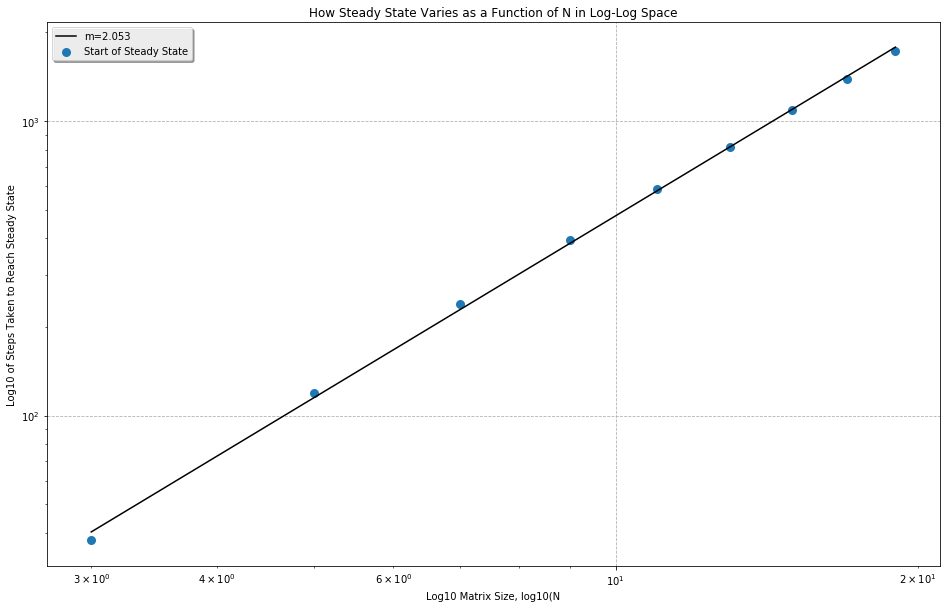

In [0]:
# Plotting Labels
plt.figure(figsize=(16,10))
plt.xlabel('Log10 Matrix Size, log10(N')
plt.ylabel('Log10 of Steps Taken to Reach Steady State')
plt.title('How Steady State Varies as a Function of N in Log-Log Space')
plt.grid(linestyle='dashed')
plt.xscale('log')
plt.yscale('log')

# Generating Values for the Trend Line in log(10) space
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress( np.log10(matrix_vals) , np.log10(steady_state_vals) )

# --- Plotting Values and Associated Trendline ---
plt.scatter(matrix_vals, steady_state_vals , label = 'Start of Steady State', linewidth = 3)# Plotting values of N against r in a scatter plot
plt.plot(matrix_vals, 10**(slope*np.log10(matrix_vals) + intercept ), label ='m=' + str(round(slope,3)) , color='black' )
# y = mx + b !!

# Legend Settings
legend = plt.legend( loc = 2 , shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

When examining the linear slope (m) in the log-log plot we find that it is equivalent to 2.046 which is approximately 2. This indicates that as N increases the time to reached steady state scales like a function of $N^2$. In other words, the number of steps required to reach steady state scales as a function of the matrix size squared. This can be shown via the following expression:

$$ Steps\:to\:Steady\:State \sim N^2$$

The reason that we never considered even values of N is because they never reach a point of steady state. As an example of showing this, let us start at 1000 steps and go until 1004 steps. 1000 steps whould be sufficient to be at the steady state and then we consider the following few steps to examine what happens to the probability distribution. I will run the step taker funciton for varying even $N$ to prove that the probability of the walker landing in a given position is constantly changing:

In [0]:
for N in range(4,20,2):
  print('N =', N)
  for m in range(1000,1005):
    prob_vector = Markov_evolution(N, m)
    print(np.matrix(prob_vector))
  print('---------------------')

N = 4
[[0.  0.5 0.  0.5]]
[[0.5 0.  0.5 0. ]]
[[0.  0.5 0.  0.5]]
[[0.5 0.  0.5 0. ]]
[[0.  0.5 0.  0.5]]
---------------------
N = 6
[[0.33333333 0.         0.33333333 0.         0.33333333 0.        ]]
[[0.         0.33333333 0.         0.33333333 0.         0.33333333]]
[[0.33333333 0.         0.33333333 0.         0.33333333 0.        ]]
[[0.         0.33333333 0.         0.33333333 0.         0.33333333]]
[[0.33333333 0.         0.33333333 0.         0.33333333 0.        ]]
---------------------
N = 8
[[0.   0.25 0.   0.25 0.   0.25 0.   0.25]]
[[0.25 0.   0.25 0.   0.25 0.   0.25 0.  ]]
[[0.   0.25 0.   0.25 0.   0.25 0.   0.25]]
[[0.25 0.   0.25 0.   0.25 0.   0.25 0.  ]]
[[0.   0.25 0.   0.25 0.   0.25 0.   0.25]]
---------------------
N = 10
[[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]]
[[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]]
[[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]]
[[0.  0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2]]
[[0.2 0.  0.2 0.  0.2 0.  0.2 0.  0.2 0. ]]
-------------------

As we can see from the output (each row is a probability distribution), at large step counts, the probability distribution simply alternates it's locations as the step count changes from even to odd. This is why even $N$ never reaches a steady state.

**Problem (10 points):** For small values of $3\leq N < 20$, diagonalize $T$, take the limit $m\to\infty$ on the eigenvalue matrix, and apply the unitary transformation to obtain the steady-state distribution for the one-dimensional random walk, if there is one. Compare with the results above.

There is another way to solve the previous problem. If we diagonalize $T$, then it can be represented as 
$$T=U\Lambda U^T,$$
where $\Lambda$ is the diagonal matrix of eigenvalues of $T$, and $U$ is a unitary transformation related to the eigenvectors (I'm writing $U^T$ as the conjugate transpose of $U$ because the Python notebook can't seem to represent the dagger). Because $UU^T=U^TU=I$ (the identity matrix), we immediately have
$$T^m=U\Lambda^mU^T.$$
Any entries with eigenvalues of $T$ larger than unity will blow up (and the system will have a run-away behaviour), and any entries with eigenvalues less than unity will disappear. So, to know if there is a steady state / stationary distribution, it suffices to diagonalize the transition matrix, take the limits, and then apply the unitary matrices.

To start, we must generate some functions that first find the (a) eigenvalues of the transition matrix and (2) create a diagonal matrix from these eigenvalues. The Unitary matrix is simply the eigenvector matrix, which we can easily retrieve whilst getting our eigen values. 

In [0]:
def find_eigen(M):
  
  """
  |
  -- How it Works --
  
  This finds the eigenvalues and eigenvectors corresponding to matrix M. This will be
  completed through use of the np.lonalg.eig function. In the second half of the function we
  sort the eigenvalues from small to large, however, it should be noted that this is not necessary.
  This is just what was done; as in linear algebra we would display final results in this manner.
  Upon running the function will returns the eigenvalue vector E and matrices S and S^-1 such that 
  A = S*D*S^-1
  
  -- Arguments --
  
  M = The matrix that we wish to diagonalize
  
  """
  
  
  evals, evectors = np.linalg.eig(M) #Find E and S
  
  #Sort the eigenvalues from small to large and the corresponding S matrix to match
  idx = evals.argsort()
  evals = evals[idx]
  evectors = evectors[:,idx]
  
  return evals, evectors, np.transpose(evectors)

Now, we want to create our diagonal matrix:

In [0]:
def gen_diagonal(E):
  
  """
  
  -- How it Works --
  
  This function works by inserting eigenvalues that are passed to the function (E) and inserting
  them into the diagonal of a square (NxN) matrix. 
  
  -- Arguments --
  
  E = The eigenvalues that will be used to great a diagonal matrix
  
  """
  
  diagonal = [] # The diagonal matrix
  
  for i in range(len(E)): # Inserting all eigenvalues itno the diagonal of a matrix
    
    row = np.zeros(len(E), dtype='float') # Creating row of 0's = # of eigenvals = N
    row[i] = E[i] # Setting the diagonal entry equal to the respective eigenvalue
    diagonal.append(row) # Storing the row and moving onto the enxt eigenvalue
  
  return diagonal

We will now peform the following operation for a large enough m to reach steady state:

$$T^m=U\Lambda^mU^T.$$

In [0]:
def find_T_m_matrix(N, m):
  
  """
  
  -- How it Works --
  
  This function will first calculate the original transition matrix T. It will then compute
  the eigenvalues and eigenvectors corresponding to T. Following this, it will perform 
  m sucessive multiplications of the diagonal matrix (by itself). It will then multipl
  the m-diagonal matrix by the transpose of the unitary matrix. Finally, it will multiply
  the unitary matrix by the product of the afformentioned matrix multiplication. The function
  will then output th final m transition matrix.
  
  -- Arguments --
  
  N = The size of the original transition matrix
  m = The number of times we wish to multiply the diagonal matrix by itself (number of steps)
  
  """
  
  # Generating Transition Matrix
  matrix = gen_T(N)
  
  # Retrieving Eigenvalues/vectors and creating diagonal matrix
  E, S, Sinv = find_eigen(matrix)
  D = gen_diagonal(E)
  D_i = D
  
  # -- Performing m Sucessive Multiplications of the Diagonal Matrix --
  for i in range(1, m):
    
    D_i = np.matmul(D_i, D)
    
  # -- Multiplying Diagonal by Unitary Matricies --
  SD_i = np.matmul(S,D_i)
  T_m = np.matmul(SD_i,Sinv)
  
  return T_m # Returning final transition matrix

Now that we have the required functions to find the probability distribution using the diagonalized $T$, let us compare the results from the Markov chain and the results from diagonlized $T$. Comparing values in the odd range $3\leq N < 20$ we find:

In [0]:
tol = 1e-8 # The tolerance between entries of the NxN matrix
m = int(1e6) # The number of multiplications that we be done on the diagnol matrix

print('The diagonalized T method finds the same result as the Markov chain for the steady state at')

for N in range(3,20,2):
  within_tol = 0

  T_m = find_T_m_matrix(N, m) # Generating final probability matrix
  pos = gen_position_vector(N) # Generating the initial position vector
  Tpos = np.dot(T_m, pos) # Creating the final probability vector (or liklihood of where
                          # the walker will be located)

  Mpos = Markov_evolution(N, 2000) # Generating the original probability matrix for 2000 steps

  for i in range(N):
    if abs(Tpos[i] - Mpos[i]) < tol:
      within_tol += 1

  if within_tol == N:
    print('N =', N, 'with uniform probability of', Tpos[0])
    print('We expected a probability of 1/'+str(N), '=', 1/N)
  else:
    print('N =', N, 'did not have equal distributions of probability at a tolerance of tol =', tol)

The diagonalized T method finds the same result as the Markov chain for the steady state at
N = 3 with uniform probability of 0.3333333332593184
We expected a probability of 1/3 = 0.3333333333333333
N = 5 with uniform probability of 0.19999999993338663
We expected a probability of 1/5 = 0.2
N = 7 with uniform probability of 0.1428571428888636
We expected a probability of 1/7 = 0.14285714285714285
N = 9 with uniform probability of 0.11111111116045433
We expected a probability of 1/9 = 0.1111111111111111
N = 11 with uniform probability of 0.09090909089899807
We expected a probability of 1/11 = 0.09090909090909091
N = 13 with uniform probability of 0.07692307688891628
We expected a probability of 1/13 = 0.07692307692307693
N = 15 with uniform probability of 0.06666666666666664
We expected a probability of 1/15 = 0.06666666666666667
N = 17 with uniform probability of 0.0588235293072732
We expected a probability of 1/17 = 0.058823529411764705
N = 19 with uniform probability of 0.05263157891

**Problem (20 points):** Follow the procedure above to obtain the eigenvalues and eigenvectors analytically for the 1D random walk. Check that these match the numerics above. Use these to obtain an estimate of the time needed to reach a steady state as a function of $N$. Interpret your results.

#### Finding Eigenvalues:

We have the equation
$$p_i=A\cos(kx_i)+B\sin(kx_i)$$
with boundary conditions
$$p_{i+N}=A\cos[k(x_i+Na)]+B\sin[k(x_i+Na)]\equiv p_i,$$
where $a$ is the lattice spacing. We then require that
$\cos(kN) = 1$ and $\sin(kn) = 0$ therefore we get
$$k = \frac{2\pi n}{N}$$
Then the action of the transition matrix on the probabilities is
$$Tp_i=\frac{1}{2}\left\{A\cos[k(x_i+a)]+B\sin[k(x_i+a)]+A\cos[k(x_i-a)]+B\sin[k(x_i-a)]\right\}.$$
We can use the trig identities
$$\frac{1}{2}[\cos(kx_i + ka)+\cos(kx_i - ka) = \cos(kx_i)\cos(ka)$$
and
$$\frac{1}{2}[\sin(kx_i + ka)+\sin(kx_i - ka) = \sin(kx_i)\cos(ka)$$
yields
$$Tp_i = A\cos(kx_i)\cos(ka)+B\sin(kx_i)\sin(ka)$$
Since the eigenvalues are defined by $Tp_i = \lambda p_i$ we get
$$\lambda p_i = \cos(ka)(A\cos(kx_i)+B\sin(kx_i))$$
$$\lambda p_i = \cos(ka) p_i$$
So for $a=1$ we get $\lambda_n = cos(k_n)$ where $k_n = \frac{2\pi n}{N}$.
Therefore we get the probabilities $p_i$ in the eigenvector $p_n$ in the general form
$$p_i = A\cos\left( \frac{2\pi n}{N}x_i\right) + B\sin\left( \frac{2\pi n}{N}x_i\right)$$


#### Determining Legitamacy of Result


Recall that our eigenvalues are given by the following expression:

$$
\lambda_n = cos\left( \frac{2\pi n}{N}a\right)
$$

Where n is the positional entry of the eigenvalue, and N is the dimension of a square matrix. Going along with the previous problem we can simply set a=1 which leaves us with:

$$
\lambda_n = cos\left( \frac{2\pi n}{N}\right)
$$

Now, how can we correlate this to the matricies in our previous question? Well, for example, let us consider an N=3 diagonal matrix:

$$M_3=\begin{pmatrix}
\lambda_0 & 0 & 0\cr
0 & \lambda_1 & 0\cr
0 & 0 & \lambda_2\cr
\end{pmatrix}.
$$

Where the correspoding diagonal matrix in the previous problem for N=3 was given by:

$$M_3=\begin{pmatrix}
-0.5 & 0 & 0\cr
0 & 1 & 0\cr
0 & 0 & -0.5\cr
\end{pmatrix}.
$$

What we want to decipher is if our derived eigen values $\lambda_n$ return the expected values. Let us just start by attempting to discern the values for $M_3$:

In [0]:
for n in range(1,4):
  #print(n)
  eigen_value = np.cos((2*np.pi*n)/3)
  print(round(eigen_value,3))

-0.5
-0.5
1.0


As we can see, we return the expected eigenvalues but not in the exact same orientation as the diagonal matrix. This is OK becuase all we really care about is the eigenvalues themselves, not where they are positioned in the matrix. As such, let us go ahead and generate a function that will calculate the eigen values for ALL odd sizes matricies between 3 and 19. The reason we will only consider the odd sized matricies is because they are the only ones that reach steady state. And if our eigenvalues are equivalent across odd values we can only assume that the same would be true for even values.


In [0]:
def eig_hunter(N):
  
  
  """
  
  -- General Description --
  
  The purpose of this function is to create eigenvalues that are described by our derived expression:
  
                              lambda_n = cos(ka) , where , k = 2 * pi * n / N
                              
  Where n is the index of the eigenvalue in the diagonal matrix and N is the NxN size of the diagonal
  matrix. It will calculate all possible eigenvalues that correspond to the diagonalized matrix.
  
  -- Arguments -- 
  
  N = The size of the matrix that we will be calculating the corresponding eigen value:
  
  """
  
  evals_list = [] # Storing all the calculated eigen values
  
  for n in range (0,N): # Calculating an eigen value for each diagonal entry
    eigen_value = np.cos((2*np.pi*n)/N) # Defined eigen value expression
    evals_list.append(round(eigen_value,5)) # Rounding values for easier comparisson
    
  return evals_list

I will define a new eigen_finder function (it is the essentially the same as the one in the previous problem, but has just been reduced down to its bare bones for efficiency).

In [0]:
def eigen_finder(M):
  
  """
  
  -- How it Works -- 
  
  The purpose of this function is to determine the eigenvalues and eigenvectors related to the
  matrix of interest, M.
  
  -- Arguments --
  
  M = The Matrix that we wish to diagonalize
  
  """ 
  
  matrix = gen_T(M)
  
  evals, evectors = np.linalg.eig(matrix)
  
  return evals, evectors

Now, allow us to create a function that will compare the expected eigenvalues to the ones that we have computed in this problem:

In [0]:
def eigen_checker( low , upp , step ):
  
  """
  
  -- How it Works --
  
  The purpose of this function is to determine if the eigenvalues described by our 
  theoretically derived method match those calculated in the previous question. This
  will be done by simply comparing each eigenvalue from both sets to one another, and
  if all eigenvalues match the function will let us know if this has occured!
  
  -- Arguments --
  
  low = The lower bound on N (Where N corresponds to the dimensions of a square NxN matrix)
  
  upp = The upper bound on N (Where N corresponds to the dimensions of a square NxN matrix)
  
  step = The step size between lower and upper bounds - best used to describe if you want
         to examine even, odd or all size matricies between your low and upp
         
  
  """
  
  for N in range( low , upp , step): # Checking all odd matrix sizes
    
    true = eigen_finder(N)[0]
    expected = eig_hunter(N)

    count = 0 # Setting counter to determine if all eigenvalues are equivalent
    
    for i in true: # Running through and comparing all eigenvalues from the previous question
      i = round(i,5) # Rounding the value so that it is easier to compare 
      for j in expected:
        
        if i == j:
          # print('The eigenvalue', i , 'element of the expected array has a match in the calculated array')
          count +=1
          break
        
    if count == N:
      print('All eigenvalues for matrix size N =', N , 'are a match')

    if count != N:
      print('Not all the eigenvalues in matrix',N ,'are a match')

Finally, allow us to run this code to see if our eigenvalues match expected results:

In [0]:
eigen_checker( 3, 20 , 2 )

All eigenvalues for matrix size N = 3 are a match
All eigenvalues for matrix size N = 5 are a match
All eigenvalues for matrix size N = 7 are a match
All eigenvalues for matrix size N = 9 are a match
All eigenvalues for matrix size N = 11 are a match
All eigenvalues for matrix size N = 13 are a match
All eigenvalues for matrix size N = 15 are a match
All eigenvalues for matrix size N = 17 are a match
All eigenvalues for matrix size N = 19 are a match


And there we have it, all of our eigenvalues match between the previous question! Finally, we must continue on to the final portion of this question - determining the time required to reach steady state. We can do this by sucessively multiplying the matricies of the corresponding eigenvalues together as we did in the previous problem. We will know that the values have reached steady state when the diagonal entries are approximately all 0. This reaching of zero is expected, as it was exactly what was found for the diagonal matrix in the previous problem. Starting with a function that takes m steps:

In [0]:
def matrix_multy(N,multiply):
  
  
  """
  
  -- How it Works --
  
  This is a modified version of the matrix multiplication function taken from the previous 
  problem. Its purpose is to simply multiplty the eigenvalues we have calculated a specified
  number of times (multiply). The final value will correspoding to the eigenvalues after the
  specified number of steps. 
  
  -- Arguments --
  
  N = The size of the original matrix
  multiply = The number of times we wish to multiply the diagonal matrix by itself
  
  """
  
  # -- Generating the Transition Matrix --
  
  # -- Calculating all Values Required for the Diagonalization of T --
  
  egn_vals = eig_hunter(N)
  diagonal = gen_diagonal(egn_vals) # The initial diagonal matrix
  d_m = diagonal # Diagonal matrix after m multiplications
  
  # -- Peforming the Diagonalization of T --
  
  for i in range(1,multiply): # Multyplying the diagonal matix by itslf m times
    d_m = np.matmul(d_m,diagonal)
 
  return d_m

In [0]:
def steady_state_hunter(low , upp , step , nsteps , tol , output):
  
  """
  
  --- How it Works --
  
  This function determines if steady state has been reached with the given eigenvalues.
  It will do this by determining if all values in the list are essentially "0", to within
  some tolerance (tol). It is recommended to use a tolerance between 1e-5 and 1e-10.
  
  -- Arguments --
  
  low = The lower bound on N (Where N corresponds to the dimensions of a square NxN matrix)
  
  upp = The upper bound on N (Where N corresponds to the dimensions of a square NxN matrix)
  
  step = The step size between lower and upper bounds - best used to describe if you want
         to examine even, odd or all size matricies between your low and upp
         
  nsteps = The number of steps that will be taken in determining if steady state is reached
  
  tol = The tolerance between values to determine steady state
  
  output = Speicifes which data you wish to output. 1 == Print statement regarding when steady
           state was reached. 2 == The lists of steady state and matrix sizes (to be used for
           plotting)
  
  """
  
  step_list = []
  matrix_list = []
  
  for N in range( low , upp , step ):
    for step in range( 2 , nsteps ):

      # -- Deleting all Values from the List that are equal to 1 ---

      eigen_values = matrix_multy(N,step).diagonal()
      zeroes = np.where(eigen_values == 1.0)[0]

      for i in zeroes: # Deleting the values that are one because we do not care about them
        eigen_values = np.delete( eigen_values , i )

      #print(eigen_values)

      # -- Determining if steady state has been reached --
      count = 0
      for i in eigen_values:
        if np.abs(i)  <= tol:
          count += 1

      #print(count)
      if count == N-1:
        if output == 1:
          print('Steady state reached after', step , 'steps for matrix size N =' , N )
          
        step_list.append(step)
        matrix_list.append(N)
        break
        
  if output == 2:
    return matrix_list, step_list

Calling the function, allow us to determine when steady state is reached:

In [0]:
steady_state_hunter(3 , 20 , 2 , 2000 , 1e-10 , 1)

Steady state reached after 34 steps for matrix size N = 3
Steady state reached after 109 steps for matrix size N = 5
Steady state reached after 221 steps for matrix size N = 7
Steady state reached after 371 steps for matrix size N = 9
Steady state reached after 557 steps for matrix size N = 11
Steady state reached after 781 steps for matrix size N = 13
Steady state reached after 1043 steps for matrix size N = 15
Steady state reached after 1341 steps for matrix size N = 17
Steady state reached after 1677 steps for matrix size N = 19


Now, allow us to plot these values to discern the trend that was observed in the previous question:

In [0]:
# Storing the Necessary values for plotting purposes
matrix_vals , steady_state_values = steady_state_hunter(3 , 20 , 2 , 1100 , 1e-5 , 2)

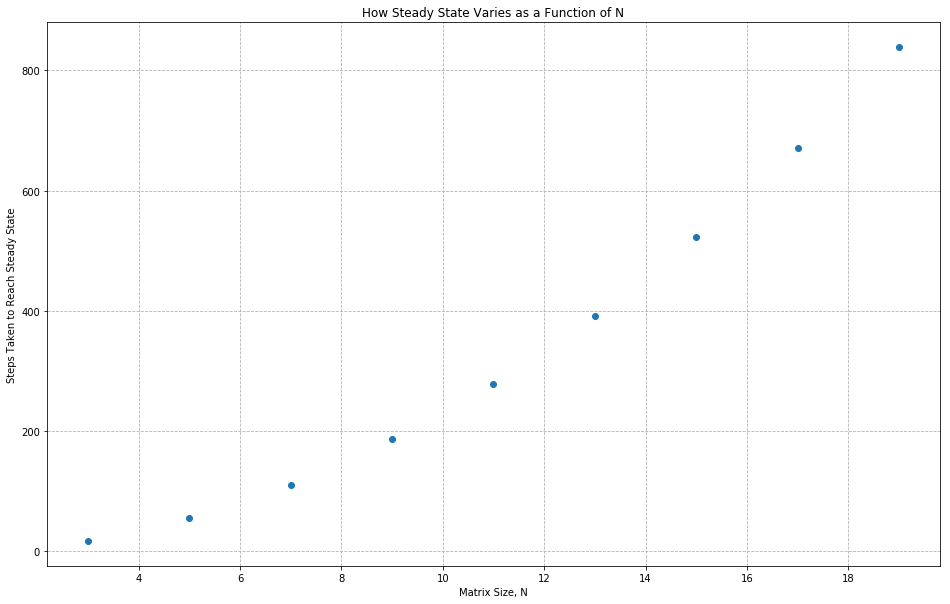

In [0]:
# Plotting Labels
plt.figure(figsize=(16,10))
plt.xlabel('Matrix Size, N')
plt.ylabel('Steps Taken to Reach Steady State')
plt.title('How Steady State Varies as a Function of N')
plt.grid(linestyle='dashed')
#plt.xscale('log')
#plt.yscale('log')

#Plotting Values and Associated Trendline
plt.scatter(matrix_vals, steady_state_values,label = 'Start of Steady State')# Plotting values of N against r in a scatter plot

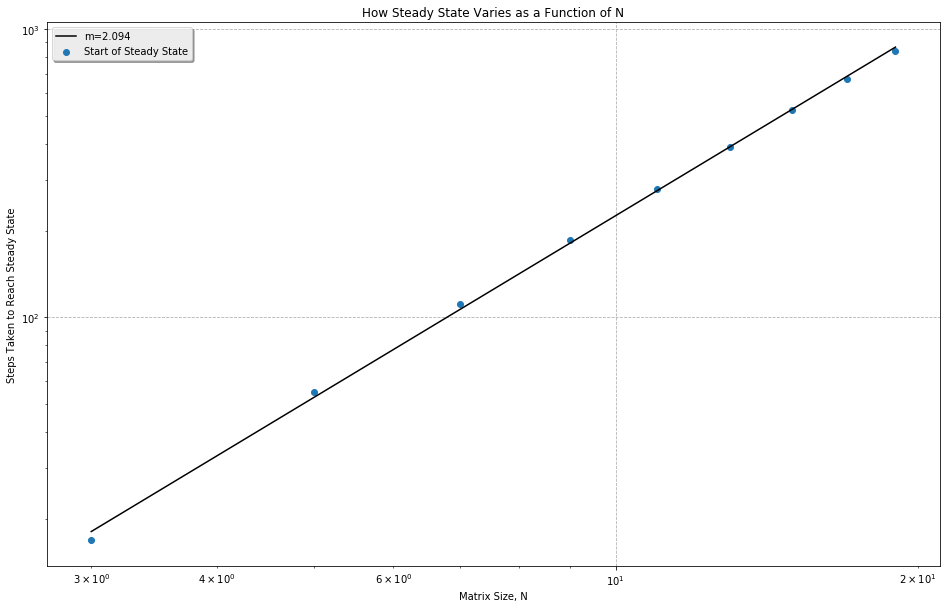

In [0]:
# Plotting Labels
plt.figure(figsize=(16,10))
plt.xlabel('Matrix Size, N')
plt.ylabel('Steps Taken to Reach Steady State')
plt.title('How Steady State Varies as a Function of N')
plt.grid(linestyle='dashed')
plt.xscale('log')
plt.yscale('log')

# Generating Values for the Trend Line in log(10) space
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress( np.log10(matrix_vals) , np.log10(steady_state_values) )

# --- Plotting Values and Associated Trendline ---
plt.scatter(matrix_vals, steady_state_values , label = 'Start of Steady State')# Plotting values of N against r in a scatter plot
plt.plot(matrix_vals, 10**(slope*np.log10(matrix_vals) + intercept ), label ='m=' + str(round(slope,3)) , color='black' )

# Legend Settings
legend = plt.legend( loc = 2 , shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

As such, we found that the slope for the theoretically derived eigenvalues reach steady state under the following scaling:

$$ Steps\:to\:Steady\:State \sim N^{2.094}$$

Which is extremely close to our results in the previous question! Some reasons for this deviation may be attributed to the tolerance values - as indicating when steady state is reached will drastically change these results.